In [14]:
import gymnasium as gym
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [32]:
class Cart_Pole_Q_Learning():
    def __init__(self):
        self.env = gym.make('CartPole-v1')
        self.env.reset()
        self.valid_states = self.create_discrete_values()
        self.action = [0,1]
        self.q_table = self.create_q_table()
        self.learning_rate = 0.1
        self.discount_factor = 1
        self.epsilon = 0.2
        self.episodes = 10000
        self.timesteps = 1000
        self.learned_episodes = 10
    #create discrete bounds for discretization
    def create_discrete_values (self):
        upper_bounds = self.env.observation_space.high
        lower_bounds = self.env.observation_space.low
        upper_bounds[1] = 3
        lower_bounds[1] = -3
        upper_bounds[3] = 10
        lower_bounds[3] = -10
        CartPos = np.linspace(lower_bounds[0],upper_bounds[0],30)
        CartVel = np.linspace(lower_bounds[1],upper_bounds[1],30)
        PoleAng = np.linspace(lower_bounds[2],upper_bounds[2],30)
        PoleVel = np.linspace(lower_bounds[3],upper_bounds[3],30)
        valid_states = [CartPos,CartVel,PoleAng,PoleVel]
        return valid_states

    #assign discrete values to continous states
    def discretize(self,observations):
        discrete_obs = []
        for i in range(len(observations)):
            discrete_obs.append(np.digitize(observations[i],self.valid_states[i])-1)   
        return tuple(discrete_obs)
    
    #create q_table
    def create_q_table (self):
        q_table = np.random.uniform(low = 0, high = 1, size =(len(self.valid_states[0]),len(self.valid_states[1]),len(self.valid_states[2]),len(self.valid_states[3]),len(self.action)))
        return q_table
    
    #update q_table
    def update_q_table (self,observations,action,reward):
        observations = self.discretize(observations)
        self.q_table[observations][action] = self.q_table[observations][action] + self.learning_rate*(reward + self.discount_factor*np.max(self.q_table[observations]))

    #update q_table in terminated
    def update_q_table_terminated(self,observations, action, reward):
        observations = self.discretize(observations)
        self.q_table[observations][action] = 0

    #choose action based on epsilon greedy policy
    def choose_action (self,observations,_):
        observations = self.discretize(observations)
        if _ < 500:
            return random.choice(self.action)
        if random.random() < self.epsilon:
             return random.choice(self.action)
        else:
            return np.argmax(self.q_table[observations][:])

    #progress episodes
    def progress_episodes(self):
        arr = []
        for episode in range(self.episodes):
            print("Episode: ",episode+1)
            total_reward = 0
            if episode >= 7000:
                self.epsilon = 0.999*self.epsilon
            (observations,_) = self.env.reset()
            for ti in range (self.timesteps):
                action = self.choose_action(observations,episode)
                (new_observations,reward,terminated,_,_) = self.env.step(action)
                total_reward += reward
                self.update_q_table(observations,action,reward)
                observations = new_observations
                if (terminated):
                    self.update_q_table_terminated(observations,action,reward)
                    print("Total reward: ",total_reward)
                    arr.append(total_reward)
                    break
        return arr
    
    #use learned strategy
    def use_learned_strategy (self):
        for episode in range (self.learned_episodes):
            (observations,_) = self.env.reset()
            print("Episode: ",episode+1)
            total_reward = 0
            for ti in range (self.timesteps):
                action = np.argmax(self.q_table[self.discretize(observations)][:])
                (new_observations,reward,terminated,_,_) = self.env.step(action)
                total_reward += reward
                observations = new_observations
                if (terminated):
                    print("Total reward: ",total_reward)
                    break
            self.env.close()
        

In [33]:
Q1 = Cart_Pole_Q_Learning()
arr = Q1.progress_episodes()

Episode:  1
Total reward:  22.0
Episode:  2
Total reward:  18.0
Episode:  3
Total reward:  20.0
Episode:  4
Total reward:  10.0
Episode:  5
Total reward:  10.0
Episode:  6
Total reward:  23.0
Episode:  7
Total reward:  43.0
Episode:  8
Total reward:  28.0
Episode:  9
Total reward:  66.0
Episode:  10
Total reward:  15.0
Episode:  11
Total reward:  22.0
Episode:  12
Total reward:  15.0
Episode:  13
Total reward:  14.0
Episode:  14
Total reward:  21.0
Episode:  15
Total reward:  19.0
Episode:  16
Total reward:  13.0
Episode:  17
Total reward:  30.0
Episode:  18
Total reward:  30.0
Episode:  19
Total reward:  15.0
Episode:  20
Total reward:  11.0
Episode:  21
Total reward:  28.0
Episode:  22
Total reward:  13.0
Episode:  23
Total reward:  13.0
Episode:  24
Total reward:  43.0
Episode:  25
Total reward:  13.0
Episode:  26
Total reward:  13.0
Episode:  27
Total reward:  24.0
Episode:  28
Total reward:  22.0
Episode:  29
Total reward:  9.0
Episode:  30
Total reward:  22.0
Episode:  31
Total r

C:\Users\ducan\AppData\Local\Temp\ipykernel_17956\3411192342.py:44: RuntimeWarning: overflow encountered in scalar add
  self.q_table[observations][action] = self.q_table[observations][action] + self.learning_rate*(reward + self.discount_factor*np.max(self.q_table[observations]))


Total reward:  16.0
Episode:  6990
Total reward:  39.0
Episode:  6991
Total reward:  50.0
Episode:  6992
Total reward:  18.0
Episode:  6993
Total reward:  10.0
Episode:  6994
Total reward:  18.0
Episode:  6995
Total reward:  16.0
Episode:  6996
Total reward:  10.0
Episode:  6997
Total reward:  11.0
Episode:  6998
Total reward:  58.0
Episode:  6999
Total reward:  9.0
Episode:  7000
Total reward:  44.0
Episode:  7001
Total reward:  12.0
Episode:  7002
Total reward:  16.0
Episode:  7003
Total reward:  30.0
Episode:  7004
Total reward:  11.0
Episode:  7005
Total reward:  20.0
Episode:  7006
Total reward:  13.0
Episode:  7007
Total reward:  30.0
Episode:  7008
Total reward:  16.0
Episode:  7009
Total reward:  10.0
Episode:  7010
Total reward:  16.0
Episode:  7011
Total reward:  12.0
Episode:  7012
Total reward:  26.0
Episode:  7013
Total reward:  12.0
Episode:  7014
Total reward:  67.0
Episode:  7015
Total reward:  17.0
Episode:  7016
Total reward:  10.0
Episode:  7017
Total reward:  12.0
E

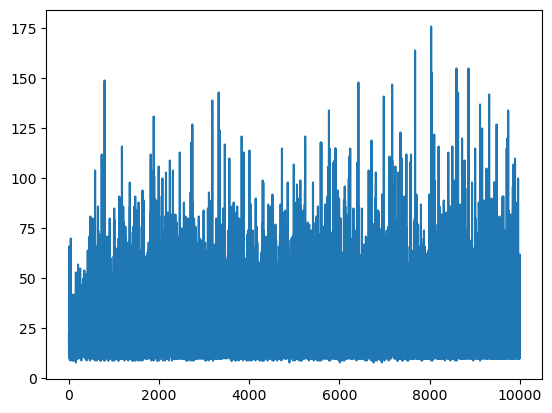

In [34]:
plt.plot(range(Q1.episodes),arr)
plt.show()

In [35]:
Q1.use_learned_strategy()

Episode:  1
Total reward:  14.0
Episode:  2
Total reward:  43.0
Episode:  3
Total reward:  68.0
Episode:  4
Total reward:  12.0
Episode:  5
Total reward:  16.0
Episode:  6
Total reward:  12.0
Episode:  7
Total reward:  36.0
Episode:  8
Total reward:  10.0
Episode:  9
Total reward:  56.0
Episode:  10
Total reward:  46.0
